This notebook gives a simple demonstration of MCMC sampling. 

We consider sampling from the following bimodal distribution. 

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import time

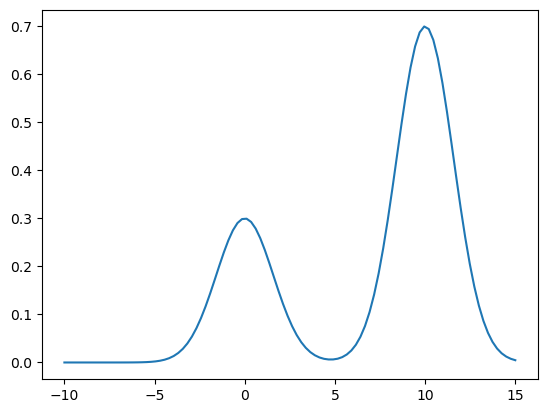

In [2]:
# parameters
n_steps = 10_000
sigma_proposal = 10
n_bins = 30

# initialization
p = lambda x: 0.3*np.exp(-0.2*x**2) + 0.7*np.exp(-0.2*(x-10)**2)
q = norm.pdf
x_current = 0
x = np.zeros((n_steps,))
y = []

fig, ax = plt.subplots(num=1)
t = np.linspace(-10, 15, 100)
ax.plot(t, np.array([p(tau) for tau in t]))

We apply the metropolis hastings algorithm. For the proposal distribution, we just use a normal distribution with std. deviation $\sigma$ centered at the current point. 

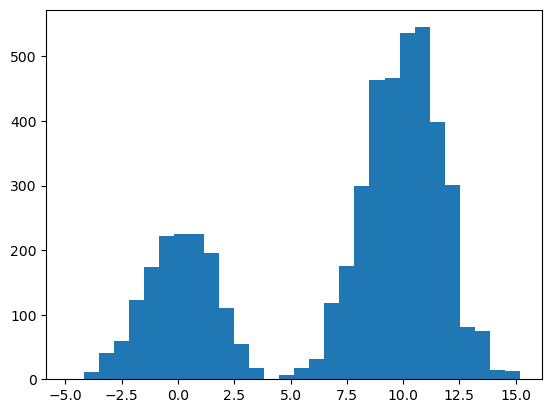

In [3]:
for i in range(n_steps):
    # draw a sample from uniform
    u = np.random.uniform()

    # draw a sample from proposal distribution
    x_star = np.random.normal(loc=x_current, scale=sigma_proposal)

    accept_thresh = min(1, (p(x_star)*q(x_current - x_star))/(p(x_current)*q(x_star-x_current)))
    if u < accept_thresh:
        x_current = x_star

    x[i] = x_current

fig, ax = plt.subplots(num=2)
ax.hist(x[5000:], bins=n_bins)
plt.show()

Closing thoughts:
- It works... 
- Try playing around with the bandwidth of the proposal distribution. If it's too narrow, then you only explore one mode. If it's too wide, then exploration is too diffuse and you don't learn anything. 